<a href="https://colab.research.google.com/github/anazkhan/DIABETIS-PREDICTION/blob/main/Diabetes_Prediction_with_KNN_and_SVM_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORTING REQUIRED LIBRARIES**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as ml
import seaborn as sb
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score , confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC




**LOADING THE DATASET**

In [ ]:
df=pd.read_csv('/content/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**EXPLORATORY DATA ANALYSIS**

In [ ]:
df.shape

(768, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


* There are 768 rows and 9 columns.
* Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI	DiabetesPedigreeFunction,Age are the Features.
*Outcome is the traget variable where 1 indicates the person is diabetic and 0 indicates the person is not diabetic. 

* Pregnancies decribes the number of times the person has been pregnant.
* Glucose describes the blood glucose level on testing.
* Blood pressure describes the diastolic blood pressure.
* Skin Thickenss describes the skin fold thickness of the triceps.
* Insulin describes the amount of insulin in a 2hour serum test.
* BMI describes he body mass index.
* DiabetesPedigreeFunction describes the family history of the person.
* Age describes the age of the person


In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

* we can see that the data is free from missing values. 

In [ ]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

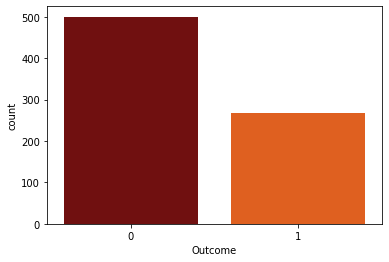

In [ ]:
sb.countplot(x='Outcome',data=df,palette='gist_heat')

* We can see that there 268 diabetic patients and 500 non diabetic patients.

In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
m=df.groupby('Outcome').mean()
m

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


* Here we can see the average of each column value for both diabetic and non diabetic patients.


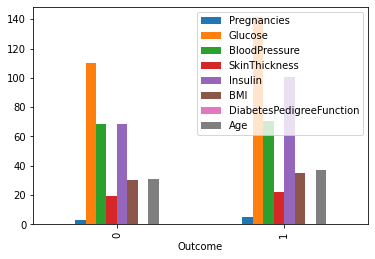

In [ ]:
m.plot(kind='bar')

* We can see from our visualization that high in Glucose and Insulin are the major reason for diabetics.

**DATA PREPROCESSING**

* In our data set we didnt find any missing values but Lets check the outliers present in BMI, Insulin and Glucose and replace them with the mean values of the respective columns. 
* we should also consider the outliers can be some rare scenarios and impossible values. we dont need to remove the rare cases but we have to remove the impossible values which can be a error and replace them with respective mean values.

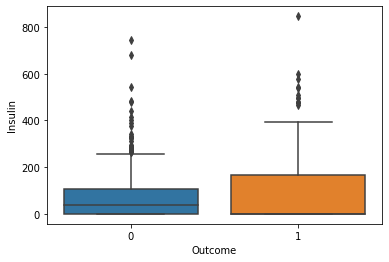

In [ ]:
sb.boxplot(x='Outcome',y='Insulin',data=df)

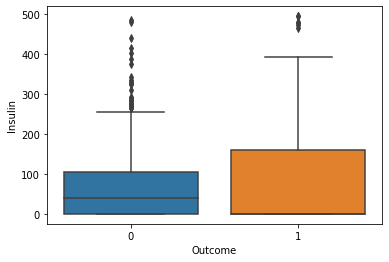

In [ ]:
for i in df['Insulin']:
  if i>500:
    df['Insulin'].replace(i,df['Insulin'].mean(),inplace=True)
sb.boxplot(x='Outcome',y='Insulin',data=df)

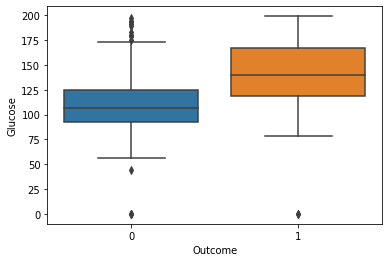

In [ ]:
sb.boxplot(x='Outcome',y='Glucose',data=df)

0    500
1    268
Name: Outcome, dtype: int64

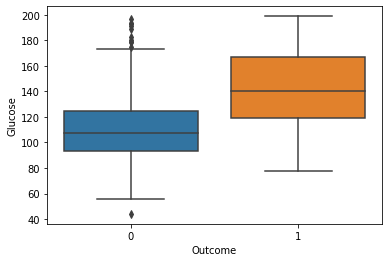

In [ ]:
for i in df['Glucose']:
  if i<25:
    df['Glucose'].replace(i,df['Glucose'].mean(),inplace=True)
sb.boxplot(x='Outcome',y='Glucose',data=df)
df['Outcome'].value_counts()

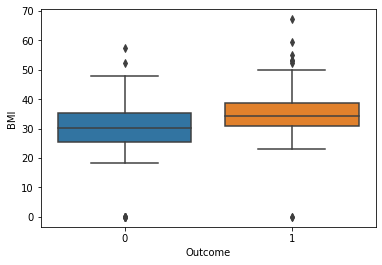

In [ ]:
sb.boxplot(x='Outcome',y='BMI',data=df)

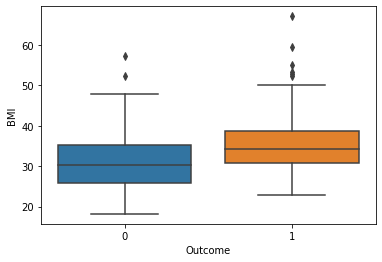

In [ ]:
for i in df['BMI']:
  if i<10:
    df['BMI'].replace(i,df['BMI'].mean(),inplace=True)
sb.boxplot(x='Outcome',y='BMI',data=df)

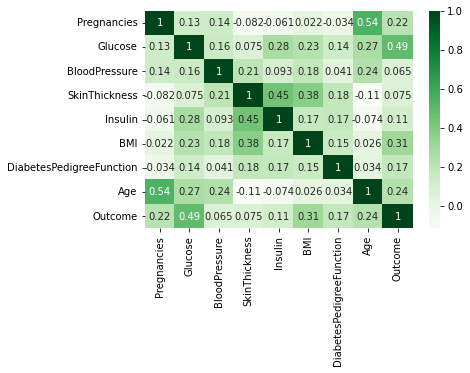

In [ ]:
sb.heatmap(df.corr(),cmap='Greens',annot=True)

* we will consider first 5 features that is most correlated with outcome and visualize that in a pairplot. 

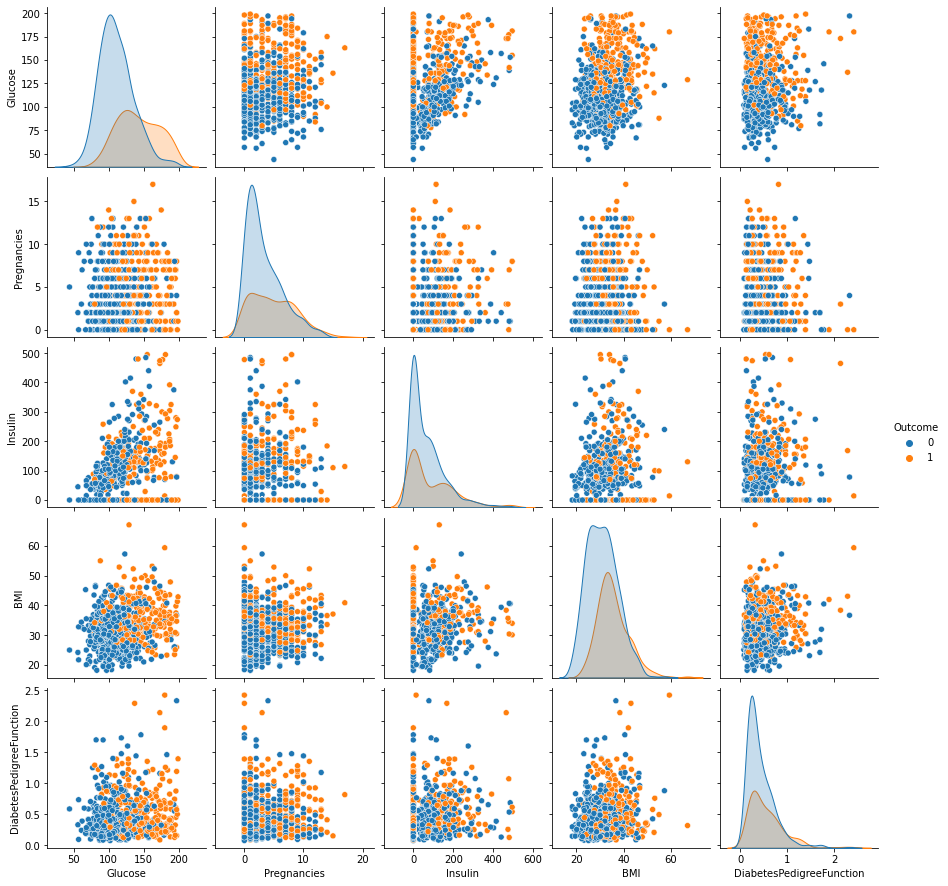

In [ ]:
sb.pairplot(df[['Glucose','Pregnancies','Insulin','BMI','DiabetesPedigreeFunction','Outcome']],hue='Outcome')

* we can see that Glucose classifies the outcome best from the visualization.

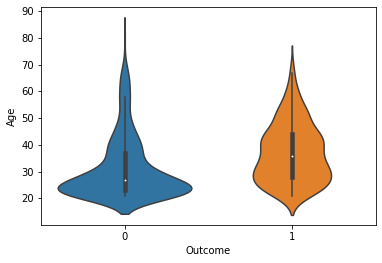

In [ ]:
sb.violinplot(x='Outcome',y='Age',data=df)

* The majority of the diabetic patients in the datasets are around the age 30 and the majority of the non diabetic patients are around the age 25


**DATA STANDARDIZATION**

In [ ]:
x=df.drop('Outcome',axis='columns')
y=df['Outcome']

In [ ]:
x.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72,35,0.0,33.6,0.627,50
1,1,85.0,66,29,0.0,26.6,0.351,31


In [ ]:
y.head(2)

0    1
1    0
Name: Outcome, dtype: int64

* we divided our feature as x and the target class as y

In [ ]:
std=StandardScaler()
x=std.fit_transform(x)
x

array([[ 0.63994726,  0.86527574,  0.14964075, ...,  0.16725546,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.20598931, -0.16054575, ..., -0.85153454,
        -0.36506078, -0.19067191],
       [ 1.23388019,  2.01597855, -0.26394125, ..., -1.33182125,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 , -0.02240928,  0.14964075, ..., -0.90975111,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.14197684, -0.47073225, ..., -0.34213954,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.94297153,  0.04624525, ..., -0.29847711,
        -0.47378505, -0.87137393]])

* we standerdized our data using Standardscaler() for making the machine easier to learn from our data.

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,stratify=y)

* Splitted our dataset for training and testing using train_test_split.

**MODELLING USING SUPPORT VECTOR CLASSIFIER**

In [ ]:
model1 = SVC()

* we initialized our model using Support vector classifier algorithm. 

In [ ]:
p={'kernel':['linear','rbf'],
   'C':range(0,12)}
# run grid search
grid_search = GridSearchCV(model1, param_grid=p, cv=10)
grid_search.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
20 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py", line 255, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py", line 333, in _dense_fit
    random_seed=random_seed,
  File "sklearn/svm/_libsvm.pyx", line 

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': range(0, 12), 'kernel': ['linear', 'rbf']})

In [ ]:
grid_search.best_estimator_

SVC(C=2, kernel='linear')

* From the Gridsearch we found that the best value for C is 2 and kernel is linear so we will consider the same parameters for our model.

In [ ]:
model1=SVC(kernel='linear',C=2)
model1.fit(x_train,y_train)

SVC(C=2, kernel='linear')

In [ ]:
model1.score(x_test,y_test)

0.7857142857142857

In [ ]:
y_pred1=model1.predict(x_test)

In [ ]:
score1=accuracy_score(y_test,y_pred1)
score1

0.7857142857142857

* we can see that our SVC model has predicted with an accuracy of 78%

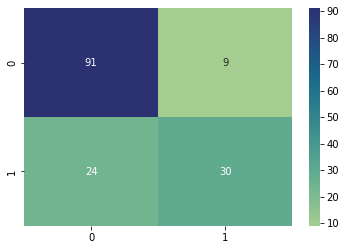

In [ ]:
k1=confusion_matrix(y_test,y_pred1)
sb.heatmap(k1,cmap='crest',annot=True)

**MODELLING USING K NEAREST NEIGHBOURS**

In [ ]:
model2 = KNeighborsClassifier()

In [ ]:
p1={'metric':['euclidean','manhattan','minkowski'],
   'n_neighbors':range(2,25)}
# run grid search
grid_search = GridSearchCV(model2, param_grid=p1, cv=10)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': range(2, 25)})

In [ ]:
grid_search.best_estimator_

KNeighborsClassifier(metric='manhattan', n_neighbors=23)

* using the Gridsearch we understood that manhattan and n_neighbors as 21 are the best model parameters for our model.

In [ ]:
model2=KNeighborsClassifier(metric='manhattan',n_neighbors=21)
model2.fit(x_train,y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=21)

* we trained our model using the best parameters.

In [ ]:
model2.score(x_train,y_train)

0.7801302931596091

In [ ]:
y_pred2=model2.predict(x_test)

In [ ]:
score2=accuracy_score(y_test,y_pred2)
score2

0.7727272727272727

*  Our KNN model has predicted with an accuracy of 77%

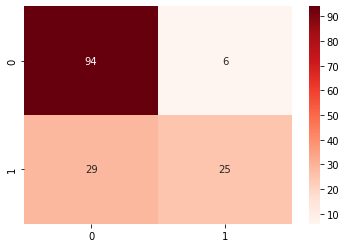

In [ ]:
k2=confusion_matrix(y_test,y_pred2)
sb.heatmap(k2,cmap='Reds',annot=True)

**CONCLUSION**

* Here we can clearly see that score1>score2 ie, SVC is the best model for our Data.